In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
dfc = pd.read_csv('calendar.csv')
dfl = pd.read_csv('listings.csv')
dfr = pd.read_csv('reviews.csv')

In [4]:
dfc.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [6]:
# ubah format data
dfc['date'] = pd.to_datetime(dfc['date'], format='%Y-%m-%d')
# Tambahkan kolom bulan dan tahun
dfc['bulan'] = dfc['date'].dt.month
dfc['tahun'] = dfc['date'].dt.year

In [8]:
dfc.head()

,listing_id,date,available,price,bulan,tahun
0,241032,2016-01-04,t,$85.00,1,2016
1,241032,2016-01-05,t,$85.00,1,2016
2,241032,2016-01-06,f,NaN,1,2016
3,241032,2016-01-07,f,NaN,1,2016
4,241032,2016-01-08,f,NaN,1,2016


In [10]:
dfc['bulan'] = dfc['date'].dt.strftime('%B')  # '%B' menghasilkan nama bulan dalam teks

In [11]:
dfc.head()

,listing_id,date,available,price,bulan,tahun
0,241032,2016-01-04,t,$85.00,January,2016
1,241032,2016-01-05,t,$85.00,January,2016
2,241032,2016-01-06,f,NaN,January,2016
3,241032,2016-01-07,f,NaN,January,2016
4,241032,2016-01-08,f,NaN,January,2016


In [12]:
dfc['price'] = dfc['price'].str.replace('$', '').str.replace(',', '').astype(float)

In [13]:
dfc = dfc.rename({'price': 'pendapatan'}, axis=1)

In [14]:
dfc.head()

,listing_id,date,available,pendapatan,bulan,tahun
0,241032,2016-01-04,t,85.0,January,2016
1,241032,2016-01-05,t,85.0,January,2016
2,241032,2016-01-06,f,NaN,January,2016
3,241032,2016-01-07,f,NaN,January,2016
4,241032,2016-01-08,f,NaN,January,2016


In [20]:
# buang null
dfc_cleaned = dfc.dropna()

In [22]:
# Membuat dictionary untuk memetakan nama bulan ke angka
month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

In [24]:
# Menambahkan kolom bulan numerik
dfc_cleaned['bulan_num'] = dfc_cleaned['bulan'].map(month_mapping)

C:\Users\Indah\AppData\Local\Temp\ipykernel_16468\1767414773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc_cleaned['bulan_num'] = dfc_cleaned['bulan'].map(month_mapping)


In [26]:
dfc_cleaned.head()

,listing_id,date,available,pendapatan,bulan,tahun,bulan_num
0,241032,2016-01-04,t,85.0,January,2016,1
1,241032,2016-01-05,t,85.0,January,2016,1
9,241032,2016-01-13,t,85.0,January,2016,1
10,241032,2016-01-14,t,85.0,January,2016,1
14,241032,2016-01-18,t,85.0,January,2016,1


In [28]:
# di sort perbulan
dfc_cleaned = dfc_cleaned.sort_values(by=['listing_id','tahun','bulan_num'])
dfc_cleaned.head()

,listing_id,date,available,pendapatan,bulan,tahun,bulan_num
797216,3335,2016-02-29,t,120.0,February,2016,2
797217,3335,2016-03-01,t,120.0,March,2016,3
797218,3335,2016-03-02,t,120.0,March,2016,3
797219,3335,2016-03-03,t,120.0,March,2016,3
797220,3335,2016-03-04,t,120.0,March,2016,3


In [30]:
dfc_r = dfc_cleaned[['listing_id','date','bulan_num','tahun','pendapatan']]
dfc_r.head()

,listing_id,date,bulan_num,tahun,pendapatan
797216,3335,2016-02-29,2,2016,120.0
797217,3335,2016-03-01,3,2016,120.0
797218,3335,2016-03-02,3,2016,120.0
797219,3335,2016-03-03,3,2016,120.0
797220,3335,2016-03-04,3,2016,120.0


In [32]:
df1 = dfc_r
df1.head()

,listing_id,date,bulan_num,tahun,pendapatan
797216,3335,2016-02-29,2,2016,120.0
797217,3335,2016-03-01,3,2016,120.0
797218,3335,2016-03-02,3,2016,120.0
797219,3335,2016-03-03,3,2016,120.0
797220,3335,2016-03-04,3,2016,120.0


### rumus filter buat dipakai nanti

In [34]:
# Hitung median price per bulan untuk tiap id, dan jumlah id di setiap bulan-tahun
df1g = df1.groupby(['listing_id', 'tahun', 'bulan_num']).agg(
    pendapatan_per_bulan=('pendapatan', 'sum'),
    median_price=('pendapatan', 'median'),
    jumlah_customer=('listing_id', 'size')
).reset_index()

In [36]:
df1g

,listing_id,tahun,bulan_num,pendapatan_per_bulan,median_price,jumlah_customer
0,3335,2016,2,120.0,120.0,1
1,3335,2016,3,3720.0,120.0,31
2,3335,2016,4,3600.0,120.0,30
3,3335,2016,5,3720.0,120.0,31
4,3335,2016,6,3600.0,120.0,30
...,...,...,...,...,...,...
36110,10340165,2016,9,1290.0,43.0,30
36111,10340165,2016,10,1333.0,43.0,31
36112,10340165,2016,11,1290.0,43.0,30
36113,10340165,2016,12,1333.0,43.0,31


In [38]:
df1.head()

,listing_id,date,bulan_num,tahun,pendapatan
797216,3335,2016-02-29,2,2016,120.0
797217,3335,2016-03-01,3,2016,120.0
797218,3335,2016-03-02,3,2016,120.0
797219,3335,2016-03-03,3,2016,120.0
797220,3335,2016-03-04,3,2016,120.0


In [40]:
#rename id jadi listing_id
dfl = dfl.rename({'id': 'listing_id'}, axis=1)

#ambil kolom yang diperlukan
dfl2 = dfl[['listing_id','name','host_id','host_response_time','host_response_rate','host_acceptance_rate','host_is_superhost','host_identity_verified','zipcode','latitude','longitude','is_location_exact','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','price','weekly_price','monthly_price','guests_included','minimum_nights','maximum_nights','review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','cancellation_policy','require_guest_profile_picture','require_guest_phone_verification']]

In [42]:
# Mengubah data yang bertipe string ke float
dfl2['price'] = dfl2['price'].str.replace('$', '').str.replace(',', '').astype(float)
dfl2['weekly_price'] = dfl2['weekly_price'].str.replace('$', '').str.replace(',', '').astype(float)
dfl2['monthly_price'] = dfl2['monthly_price'].str.replace('$', '').str.replace(',', '').astype(float)
dfl2['host_response_rate'] = dfl2['host_response_rate'].str.replace('%', '').astype(float)
dfl2['host_acceptance_rate'] = dfl2['host_acceptance_rate'].str.replace('%', '').astype(float)

# Mengubah data yang beripe integer ke string
dfl2['host_id'] = dfl2['host_id'].astype(str)
dfl2['latitude'] = dfl2['latitude'].astype(str)
dfl2['longitude'] = dfl2['longitude'].astype(str)

C:\Users\Indah\AppData\Local\Temp\ipykernel_16468\2586953589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfl2['price'] = dfl2['price'].str.replace('$', '').str.replace(',', '').astype(float)
C:\Users\Indah\AppData\Local\Temp\ipykernel_16468\2586953589.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfl2['weekly_price'] = dfl2['weekly_price'].str.replace('$', '').str.replace(',', '').astype(float)
C:\Users\Indah\AppData\Local\Temp\ipykernel_16468\2586953589.py:4: SettingWithCopyWarning: 
A value 

In [44]:
dfl2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   listing_id                        3818 non-null   int64  
 1   name                              3818 non-null   object 
 2   host_id                           3818 non-null   object 
 3   host_response_time                3295 non-null   object 
 4   host_response_rate                3295 non-null   float64
 5   host_acceptance_rate              3045 non-null   float64
 6   host_is_superhost                 3816 non-null   object 
 7   host_identity_verified            3816 non-null   object 
 8   zipcode                           3811 non-null   object 
 9   latitude                          3818 non-null   object 
 10  longitude                         3818 non-null   object 
 11  is_location_exact                 3818 non-null   object 
 12  proper

In [46]:
df1g2 = df1g [['listing_id', 'pendapatan_per_bulan','jumlah_customer']]

In [48]:
df1g2

,listing_id,pendapatan_per_bulan,jumlah_customer
0,3335,120.0,1
1,3335,3720.0,31
2,3335,3600.0,30
3,3335,3720.0,31
4,3335,3600.0,30
...,...,...,...
36110,10340165,1290.0,30
36111,10340165,1333.0,31
36112,10340165,1290.0,30
36113,10340165,1333.0,31


In [50]:
df1g3 = df1g2.groupby(['listing_id']).agg(
    total_pendapatan=('pendapatan_per_bulan', 'sum'),
    total_customer=('jumlah_customer', 'sum')).reset_index()

In [52]:
df1g3

,listing_id,total_pendapatan,total_customer
0,3335,37080.0,309
1,4291,29930.0,365
2,5682,16669.0,309
3,6606,33890.0,365
4,7369,4505.0,53
...,...,...,...
3718,10331249,15930.0,354
3719,10332096,14600.0,365
3720,10334184,43320.0,361
3721,10339145,86835.0,365


In [54]:
# Menggabungkan dfcg3 dan dfl2 berdasarkan 'listing_id dengan tujuan memembuat kolom jumlah_id di dataset listing
dfl3 = pd.merge(df1g3, dfl2, on='listing_id', how='left')
dfl3.head()

,listing_id,total_pendapatan,total_customer,name,host_id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,3335,37080.0,309,Sweet Seattle Urban Homestead 2 Bdr,4193,within a few hours,88.0,100.0,f,t,...,NaN,NaN,NaN,NaN,NaN,NaN,f,strict,f,f
1,4291,29930.0,365,Sunrise in Seattle Master Suite,35749,within a day,100.0,100.0,f,t,...,10.0,9.0,10.0,9.0,9.0,9.0,f,moderate,f,f
2,5682,16669.0,309,"Cozy Studio, min. to downtown -WiFi",8993,within an hour,100.0,100.0,f,t,...,10.0,10.0,10.0,10.0,9.0,10.0,t,strict,f,t
3,6606,33890.0,365,"Fab, private seattle urban cottage!",14942,within a few hours,90.0,100.0,f,t,...,9.0,9.0,10.0,9.0,10.0,9.0,f,strict,f,f
4,7369,4505.0,53,launchingpad/landingpad,19425,NaN,NaN,NaN,f,f,...,10.0,10.0,10.0,10.0,10.0,9.0,f,flexible,f,f


In [56]:
df2 = dfl3

In [58]:
#df1 = data calendar final
#df2 = data listing final

In [60]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 934542 entries, 797216 to 744234
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   listing_id  934542 non-null  int64         
 1   date        934542 non-null  datetime64[ns]
 2   bulan_num   934542 non-null  int64         
 3   tahun       934542 non-null  int32         
 4   pendapatan  934542 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2)
memory usage: 39.2 MB


In [62]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3723 entries, 0 to 3722
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   listing_id                        3723 non-null   int64  
 1   total_pendapatan                  3723 non-null   float64
 2   total_customer                    3723 non-null   int64  
 3   name                              3723 non-null   object 
 4   host_id                           3723 non-null   object 
 5   host_response_time                3243 non-null   object 
 6   host_response_rate                3243 non-null   float64
 7   host_acceptance_rate              3000 non-null   float64
 8   host_is_superhost                 3721 non-null   object 
 9   host_identity_verified            3721 non-null   object 
 10  zipcode                           3716 non-null   object 
 11  latitude                          3723 non-null   object 
 12  longit

In [64]:
#hanya untuk eda kita hapus kolom id di kedua dataframe
df1_without_id = df1.drop(columns=['listing_id'])
df2_without_id = df2.drop(columns=['listing_id'])

In [66]:
# Mengambil kolom numerik dari df1_without_id
nums1 = df1_without_id.select_dtypes(include=['float64', 'int32', 'int64'])

# Mengambil kolom kategorikal dari df2_without_id
cats2 = df2_without_id.select_dtypes(include=['object'])

# Mengambil kolom numerik dari df2_without_id
nums2 = df2_without_id.select_dtypes(include=['float64', 'int64'])

In [68]:
# Mencetak judul kolom dari DataFrame nums1
print("\nKolom numerik (nums1):")
print(nums1.columns.tolist())

# Mencetak judul kolom dari DataFrame cats2
print("Kolom kategorikal (cats2):")
print(cats2.columns.tolist())

# Mencetak judul kolom dari DataFrame nums2
print("Kolom kategorikal (nums2):")
print(nums2.columns.tolist())


Kolom numerik (nums1):
['bulan_num', 'tahun', 'pendapatan']
Kolom kategorikal (cats2):
['name', 'host_id', 'host_response_time', 'host_is_superhost', 'host_identity_verified', 'zipcode', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'bed_type', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification']
Kolom kategorikal (nums2):
['total_pendapatan', 'total_customer', 'host_response_rate', 'host_acceptance_rate', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'weekly_price', 'monthly_price', 'guests_included', 'minimum_nights', 'maximum_nights', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']


In [70]:
# Daftar kolom nums2
nums2 = ['total_pendapatan','total_customer', 'host_response_rate', 'host_acceptance_rate', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'weekly_price', 'monthly_price',
'guests_included', 'minimum_nights', 'maximum_nights', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']

# Membagi nums2 menjadi 4 bagian, masing-masing 5 kolom
nums21 = nums2[:5]
nums22 = nums2[5:10]
nums23 = nums2[10:15]
nums24 = nums2[15:]

print(nums21)
print(nums22)
print(nums23)
print(nums24)

['total_pendapatan', 'total_customer', 'host_response_rate', 'host_acceptance_rate', 'accommodates']
['bathrooms', 'bedrooms', 'beds', 'price', 'weekly_price']
['monthly_price', 'guests_included', 'minimum_nights', 'maximum_nights', 'review_scores_rating']
['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']


In [72]:
print(nums2)

['total_pendapatan', 'total_customer', 'host_response_rate', 'host_acceptance_rate', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'weekly_price', 'monthly_price', 'guests_included', 'minimum_nights', 'maximum_nights', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']


In [74]:
df1.head()

,listing_id,date,bulan_num,tahun,pendapatan
797216,3335,2016-02-29,2,2016,120.0
797217,3335,2016-03-01,3,2016,120.0
797218,3335,2016-03-02,3,2016,120.0
797219,3335,2016-03-03,3,2016,120.0
797220,3335,2016-03-04,3,2016,120.0


In [76]:
df2.head()

,listing_id,total_pendapatan,total_customer,name,host_id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,3335,37080.0,309,Sweet Seattle Urban Homestead 2 Bdr,4193,within a few hours,88.0,100.0,f,t,...,NaN,NaN,NaN,NaN,NaN,NaN,f,strict,f,f
1,4291,29930.0,365,Sunrise in Seattle Master Suite,35749,within a day,100.0,100.0,f,t,...,10.0,9.0,10.0,9.0,9.0,9.0,f,moderate,f,f
2,5682,16669.0,309,"Cozy Studio, min. to downtown -WiFi",8993,within an hour,100.0,100.0,f,t,...,10.0,10.0,10.0,10.0,9.0,10.0,t,strict,f,t
3,6606,33890.0,365,"Fab, private seattle urban cottage!",14942,within a few hours,90.0,100.0,f,t,...,9.0,9.0,10.0,9.0,10.0,9.0,f,strict,f,f
4,7369,4505.0,53,launchingpad/landingpad,19425,NaN,NaN,NaN,f,f,...,10.0,10.0,10.0,10.0,10.0,9.0,f,flexible,f,f


# EDA

## Descriptive Analysis

### df1

In [78]:
# Mengecek data yang kosong ada berapa 
df1.isna().sum()

listing_id    0
date          0
bulan_num     0
tahun         0
pendapatan    0
dtype: int64

In [80]:
df1desc = df1.describe()

In [82]:
df1.describe()

,listing_id,date,bulan_num,tahun,pendapatan
count,9.345420e+05,934542,934542.000000,934542.000000,934542.000000
mean,5.305517e+06,2016-07-08 08:12:42.911458560,6.661120,2016.006097,137.944859
min,3.335000e+03,2016-01-04 00:00:00,1.000000,2016.000000,10.000000
25%,2.875975e+06,2016-04-07 00:00:00,4.000000,2016.000000,75.000000
50%,5.615620e+06,2016-07-08 00:00:00,7.000000,2016.000000,109.000000
75%,7.873345e+06,2016-10-09 00:00:00,10.000000,2016.000000,160.000000
max,1.034016e+07,2017-01-02 00:00:00,12.000000,2017.000000,1650.000000
std,2.974821e+06,NaN,3.446401,0.077846,105.062870


In [84]:
# Konversi output describe ke format Markdown
print(df1.describe().to_markdown())

|       |       listing_id | date                          |    bulan_num |          tahun |   pendapatan |
|:------|-----------------:|:------------------------------|-------------:|---------------:|-------------:|
| count | 934542           | 934542                        | 934542       | 934542         |   934542     |
| mean  |      5.30552e+06 | 2016-07-08 08:12:42.911458560 |      6.66112 |   2016.01      |      137.945 |
| min   |   3335           | 2016-01-04 00:00:00           |      1       |   2016         |       10     |
| 25%   |      2.87598e+06 | 2016-04-07 00:00:00           |      4       |   2016         |       75     |
| 50%   |      5.61562e+06 | 2016-07-08 00:00:00           |      7       |   2016         |      109     |
| 75%   |      7.87334e+06 | 2016-10-09 00:00:00           |     10       |   2016         |      160     |
| max   |      1.03402e+07 | 2017-01-02 00:00:00           |     12       |   2017         |     1650     |
| std   |      2.97482e+06 |

### df2

In [86]:
#Mengecek data kosong ada berapa 
print(df2.isna().sum().to_markdown())

|                                  |    0 |
|:---------------------------------|-----:|
| listing_id                       |    0 |
| total_pendapatan                 |    0 |
| total_customer                   |    0 |
| name                             |    0 |
| host_id                          |    0 |
| host_response_time               |  480 |
| host_response_rate               |  480 |
| host_acceptance_rate             |  723 |
| host_is_superhost                |    2 |
| host_identity_verified           |    2 |
| zipcode                          |    7 |
| latitude                         |    0 |
| longitude                        |    0 |
| is_location_exact                |    0 |
| property_type                    |    1 |
| room_type                        |    0 |
| accommodates                     |    0 |
| bathrooms                        |   16 |
| bedrooms                         |    6 |
| beds                             |    1 |
| bed_type                      

In [88]:
print(df2.describe().T.to_markdown())

|                             |   count |            mean |             std |   min |             25% |             50% |            75% |              max |
|:----------------------------|--------:|----------------:|----------------:|------:|----------------:|----------------:|---------------:|-----------------:|
| listing_id                  |    3723 |     5.54805e+06 |     2.96979e+06 |  3335 |     3.24243e+06 |     6.11982e+06 |     8.0368e+06 |      1.03402e+07 |
| total_pendapatan            |    3723 | 34626.7         | 33041.2         |    49 | 13737.5         | 26935           | 44201.5        | 362941           |
| total_customer              |    3723 |   251.019       |   122.12        |     1 |   139           |   313           |   360          |    365           |
| host_response_rate          |    3243 |    94.8545      |    11.9244      |    17 |    98           |   100           |   100          |    100           |
| host_acceptance_rate        |    3000 |    99.9667

## Univariate Analysis

### df1

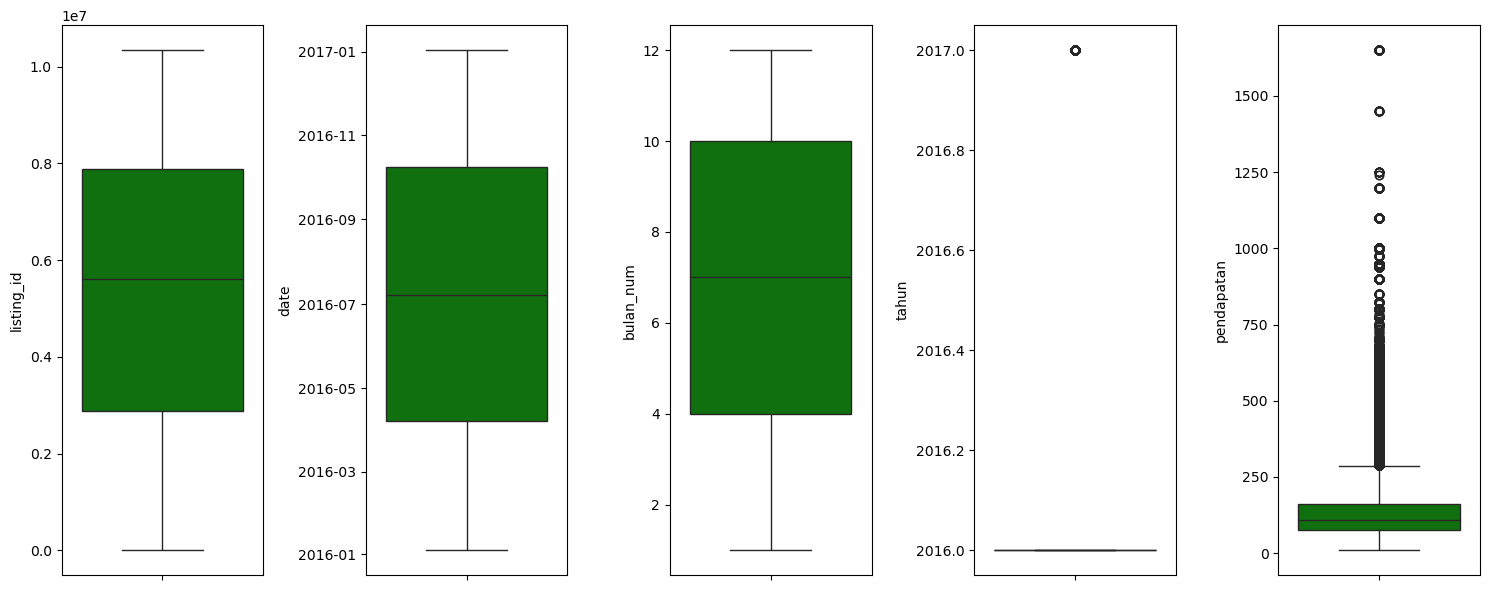

In [158]:
plt.figure(figsize=(15, 6))

for i, col in enumerate(df1.columns):
    plt.subplot(1, len(df1.columns), i + 1)
    sns.boxplot(y=df1[col], color='green', orient = 'v')
    plt.tight_layout()

In [176]:
# Filter data untuk tahun 2017
df1_2017 = df1[df1['tahun'] == 2017]

# Dapatkan tanggal paling akhir di tahun 2017
tanggal_terakhir_2017 = df1_2017['date'].max()

print(tanggal_terakhir_2017)

2017-01-02 00:00:00


In [181]:
# Filter data untuk tahun 2016
df1_2016 = df1[df1['tahun'] == 2016]

# Dapatkan tanggal paling awal di tahun 2016
tanggal_pertama_2016 = df1_2016['date'].min()

print(tanggal_pertama_2016)

2016-01-04 00:00:00


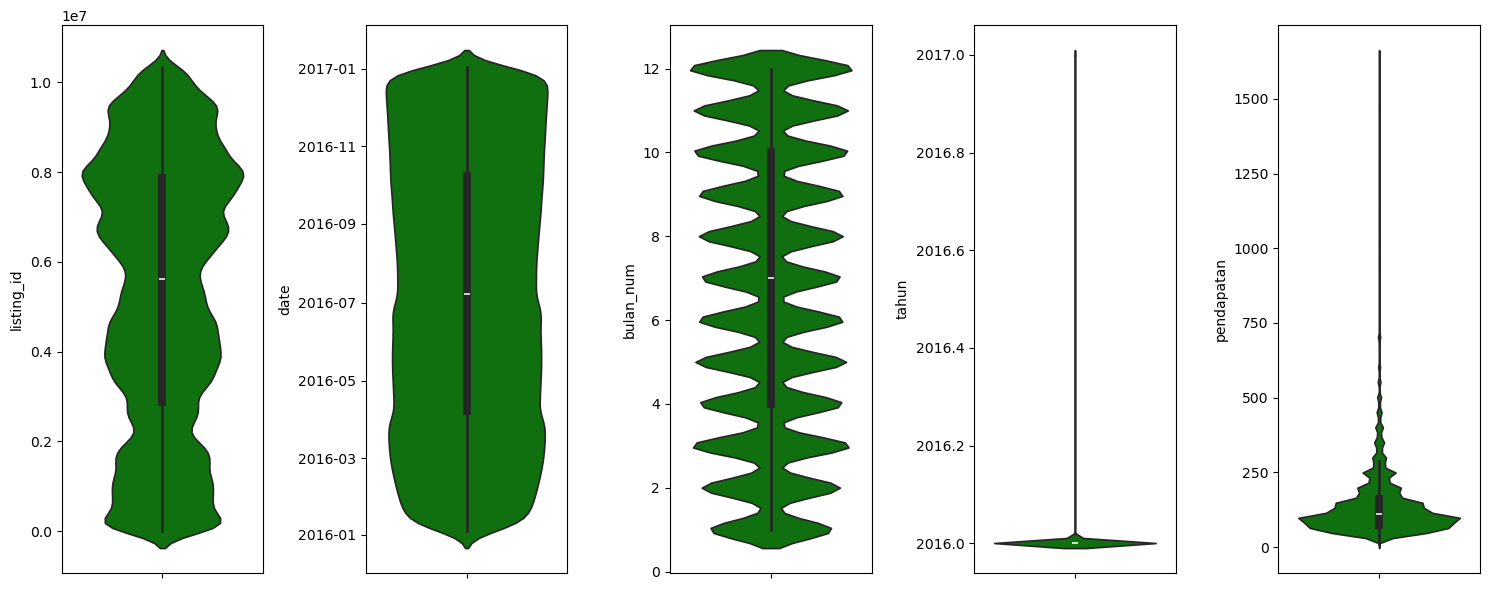

In [185]:
plt.figure(figsize=(15, 6))

for i, col in enumerate(df1.columns):
    plt.subplot(1, len(df1.columns), i + 1)
    sns.violinplot(y=df1[col], color='green', orient='v')
    plt.tight_layout()

plt.show()

### df2

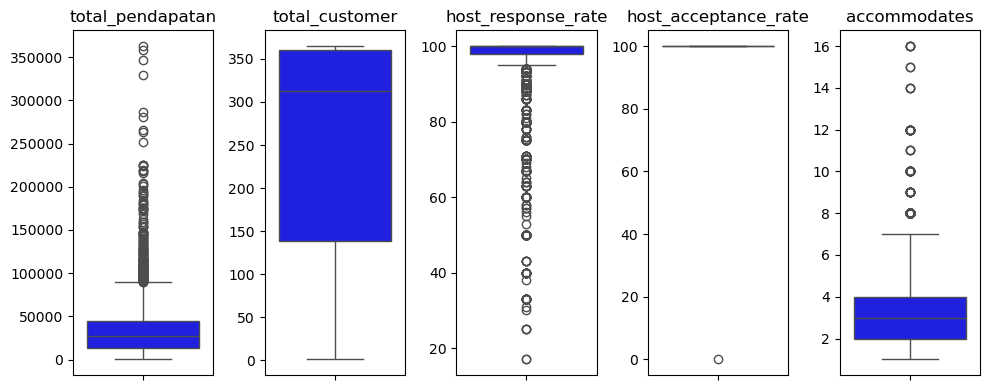

In [188]:
num_cols = 5  # Jumlah kolom yang diinginkan
num_rows = -(-len(nums21) // num_cols)  # Hitung jumlah baris secara otomatis

# Atur ukuran figure dan buat subplot
plt.figure(figsize=(10, 4))  # Sesuaikan ukuran figure sesuai kebutuhan
for i, column in enumerate(nums21):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(y=df2[column], color='blue', orient='v')
    plt.title(column)  # Tambahkan judul untuk setiap subplot
    plt.ylabel('')  # Hapus label y pada subplot selain yang paling kiri

plt.tight_layout()
plt.show()

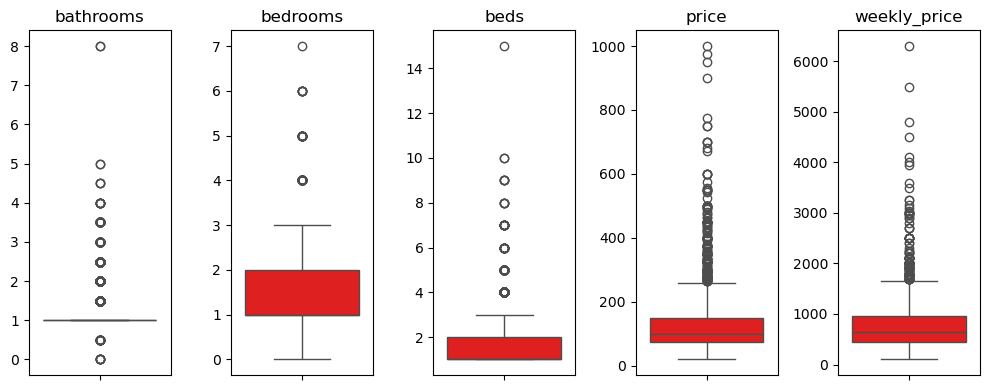

In [190]:
num_cols = 5  # Jumlah kolom yang diinginkan
num_rows = -(-len(nums22) // num_cols)  # Hitung jumlah baris secara otomatis

# Atur ukuran figure dan buat subplot
plt.figure(figsize=(10, 4))  # Sesuaikan ukuran figure sesuai kebutuhan
for i, column in enumerate(nums22):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(y=df2[column], color='red', orient='v')
    plt.title(column)  # Tambahkan judul untuk setiap subplot
    plt.ylabel('')  # Hapus label y pada subplot selain yang paling kiri

plt.tight_layout()
plt.show()

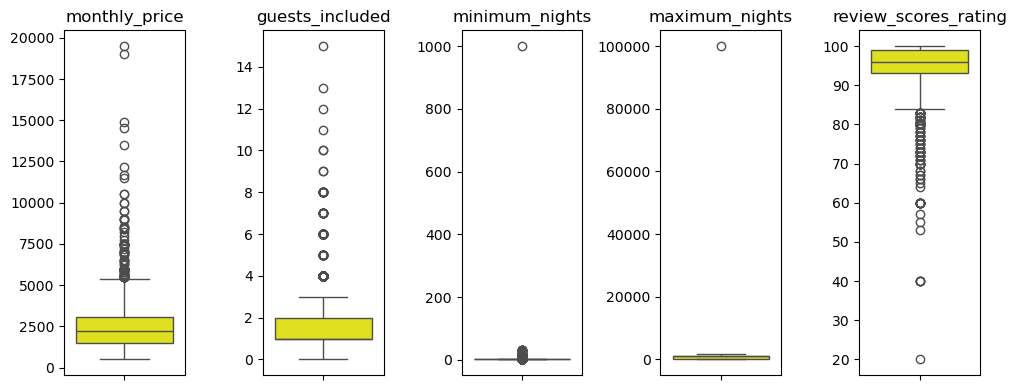

In [192]:
num_cols = 5  # Jumlah kolom yang diinginkan
num_rows = -(-len(nums23) // num_cols)  # Hitung jumlah baris secara otomatis

# Atur ukuran figure dan buat subplot
plt.figure(figsize=(10, 4))  # Sesuaikan ukuran figure sesuai kebutuhan
for i, column in enumerate(nums23):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(y=df2[column], color='yellow', orient='v')
    plt.title(column)  # Tambahkan judul untuk setiap subplot
    plt.ylabel('')  # Hapus label y pada subplot selain yang paling kiri

plt.tight_layout()
plt.show()

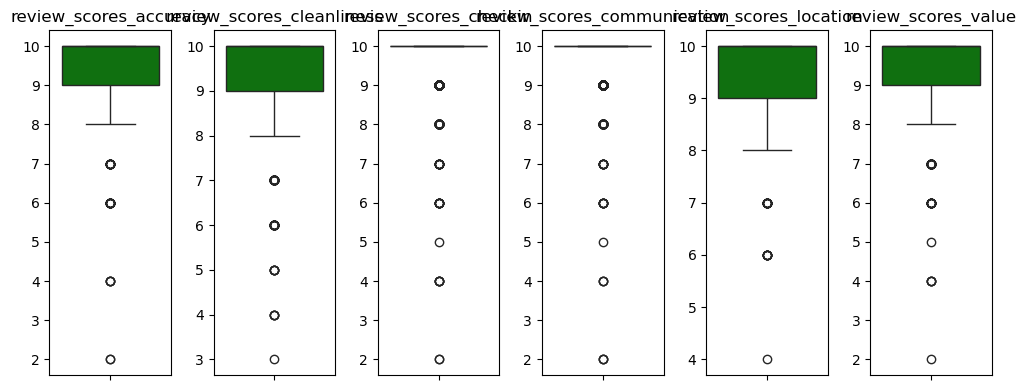

In [194]:
num_cols = 6  # Jumlah kolom yang diinginkan
num_rows = -(-len(nums24) // num_cols)  # Hitung jumlah baris secara otomatis

# Atur ukuran figure dan buat subplot
plt.figure(figsize=(10, 4))  # Sesuaikan ukuran figure sesuai kebutuhan
for i, column in enumerate(nums24):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(y=df2[column], color='green', orient='v')
    plt.title(column)  # Tambahkan judul untuk setiap subplot
    plt.ylabel('')  # Hapus label y pada subplot selain yang paling kiri

plt.tight_layout()
plt.show()

## Multivariate Analysis

### df1

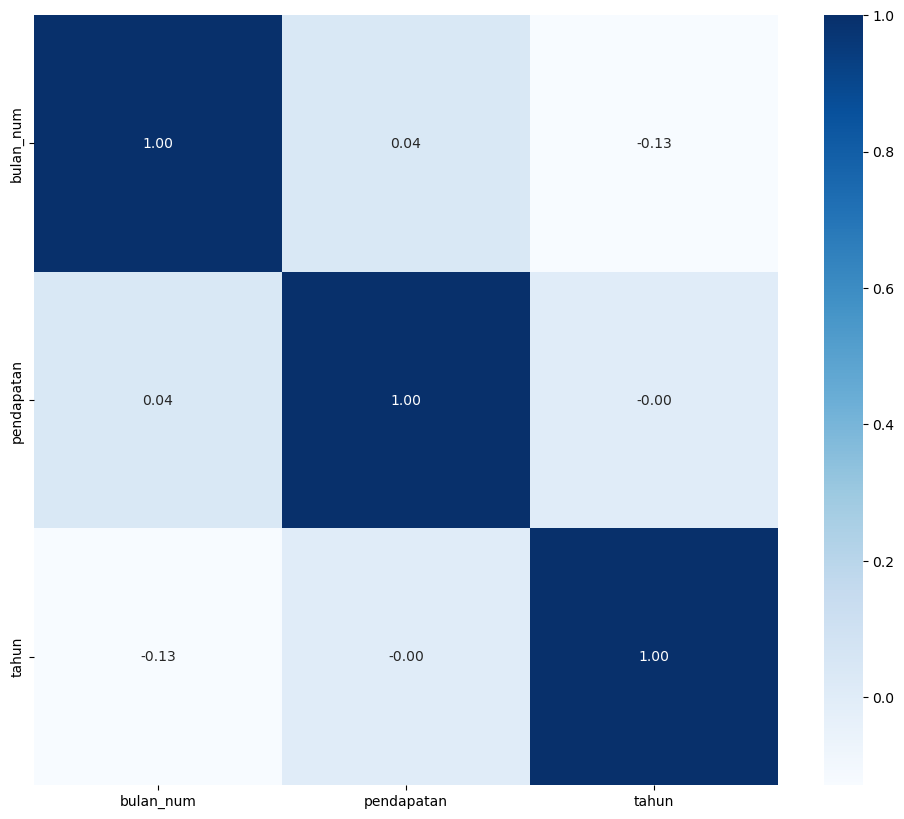

In [202]:
# Memilih hanya kolom numerik dari nums1
numeric_df = df1[['bulan_num', 'pendapatan', 'tahun']]

# Membuat heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()


### df2

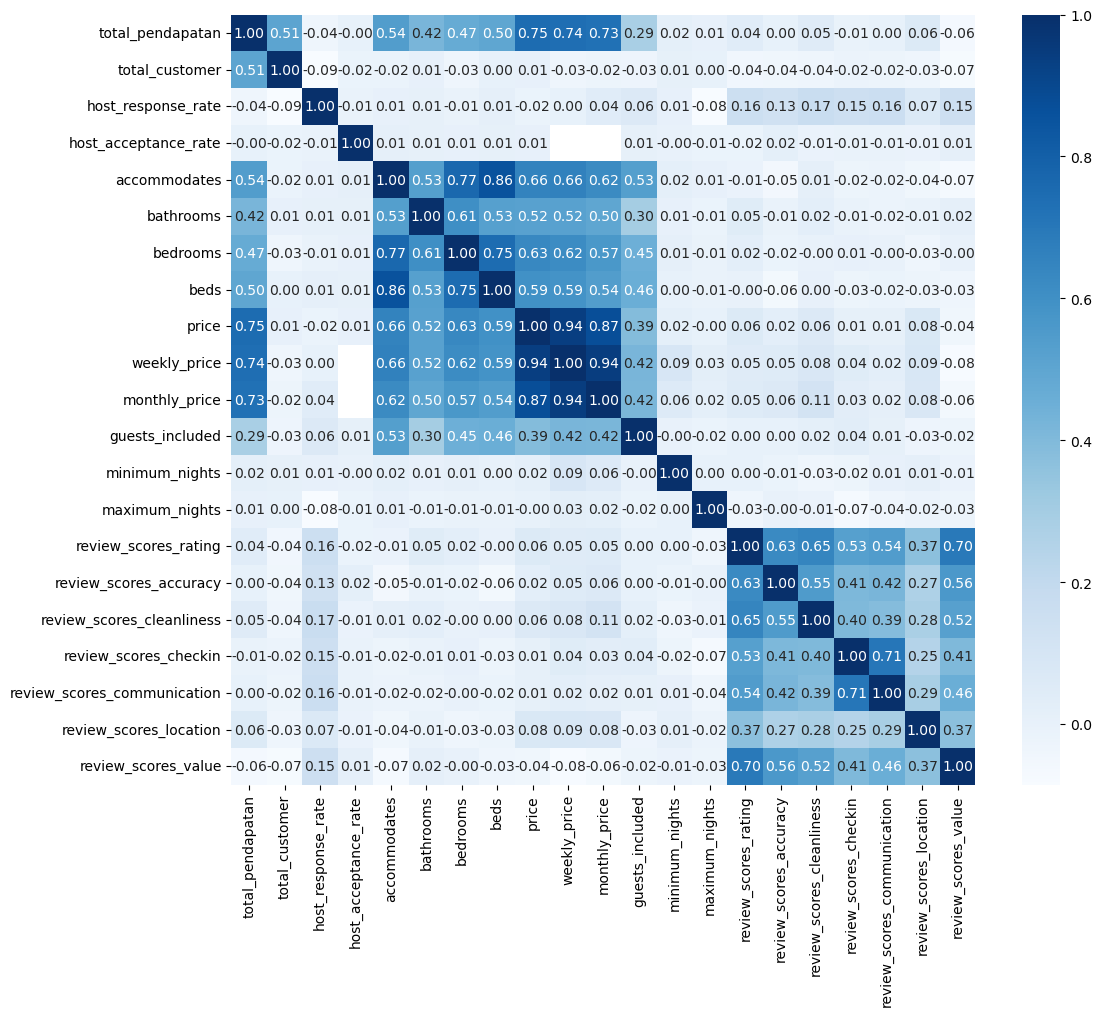

In [215]:
# Memilih hanya kolom numerik dari nums1
numeric_df = df2[['total_pendapatan', 'total_customer', 'host_response_rate', 'host_acceptance_rate', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'weekly_price', 'monthly_price', 'guests_included', 'minimum_nights', 'maximum_nights', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']]

# Membuat heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()


## Business Insight

In [217]:
df1.tail()

,listing_id,date,bulan_num,tahun,pendapatan
744230,10340165,2016-12-29,12,2016,43.0
744231,10340165,2016-12-30,12,2016,43.0
744232,10340165,2016-12-31,12,2016,43.0
744233,10340165,2017-01-01,1,2017,43.0
744234,10340165,2017-01-02,1,2017,43.0


In [219]:
df1g2.head()

,listing_id,pendapatan_per_bulan,jumlah_customer
0,3335,120.0,1
1,3335,3720.0,31
2,3335,3600.0,30
3,3335,3720.0,31
4,3335,3600.0,30


In [221]:
df1_group_tren = df1g [['listing_id', 'bulan_num','pendapatan_per_bulan','jumlah_customer']]

In [223]:
df1_group_tren

,listing_id,bulan_num,pendapatan_per_bulan,jumlah_customer
0,3335,2,120.0,1
1,3335,3,3720.0,31
2,3335,4,3600.0,30
3,3335,5,3720.0,31
4,3335,6,3600.0,30
...,...,...,...,...
36110,10340165,9,1290.0,30
36111,10340165,10,1333.0,31
36112,10340165,11,1290.0,30
36113,10340165,12,1333.0,31


In [227]:
df1_group_tren2 = df1_group_tren.groupby(['bulan_num']).agg(jumlah_cust = ('jumlah_customer', sum)).reset_index()

C:\Users\Swift3\AppData\Local\Temp\ipykernel_8140\2264836592.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df1_group_tren2 = df1_group_tren.groupby(['bulan_num']).agg(jumlah_cust = ('jumlah_customer', sum)).reset_index()


In [229]:
df1_group_tren2

,bulan_num,jumlah_cust
0,1,64937
1,2,73321
2,3,83938
3,4,76037
4,5,79971
5,6,77244
6,7,74222
7,8,76347
8,9,77246
9,10,82438


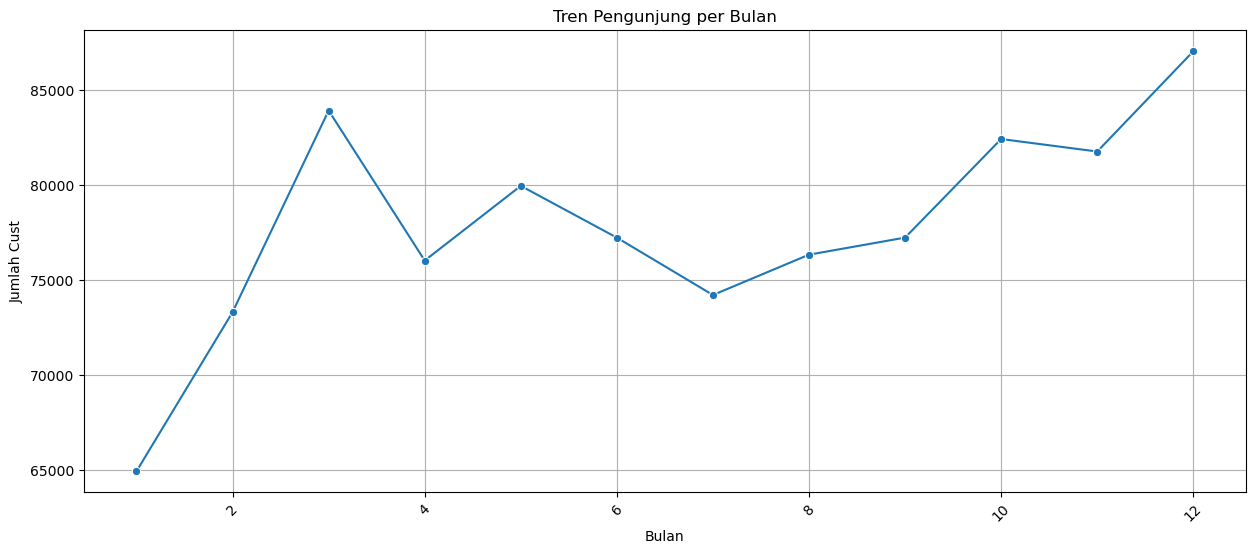

In [231]:
import matplotlib.pyplot as plt
import seaborn as sns

# Buat plot tren
plt.figure(figsize=(15, 6))
sns.lineplot(data=df1_group_tren2, x='bulan_num', y='jumlah_cust', marker='o')
plt.title('Tren Pengunjung per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Cust')
plt.xticks(rotation=45)  # Jika nama bulan panjang, rotasikan agar lebih terbaca
plt.grid(True)           # Tambahkan grid untuk membantu visualisasi
plt.show()

In [233]:
# Filter data untuk tahun 2017
df1_2017 = df1[df1['tahun'] == 2017]

# Ambil daftar unik bulan di tahun 2017
bulan_2017 = df1_2017['bulan_num'].unique()

# Urutkan bulan jika diperlukan
bulan_2017 = sorted(bulan_2017)

In [235]:
bulan_2017

[1]

In [237]:
# Filter data untuk tahun 2017
df1_2016 = df1[df1['tahun'] == 2016]

# Ambil daftar unik bulan di tahun 2017
bulan_2016 = df1_2016['bulan_num'].unique()

# Urutkan bulan jika diperlukan
bulan_2016 = sorted(bulan_2016)

In [239]:
bulan_2016

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [241]:
df1_group_tren3 = df1_group_tren.groupby(['bulan_num']).agg(jumlah_pendapatan = ('pendapatan_per_bulan', sum)).reset_index()

C:\Users\Swift3\AppData\Local\Temp\ipykernel_8140\3834097144.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df1_group_tren3 = df1_group_tren.groupby(['bulan_num']).agg(jumlah_pendapatan = ('pendapatan_per_bulan', sum)).reset_index()


In [243]:
df1_group_tren3.head()

,bulan_num,jumlah_pendapatan
0,1,7981548.0
1,2,9113355.0
2,3,10798161.0
3,4,10272371.0
4,5,11159008.0


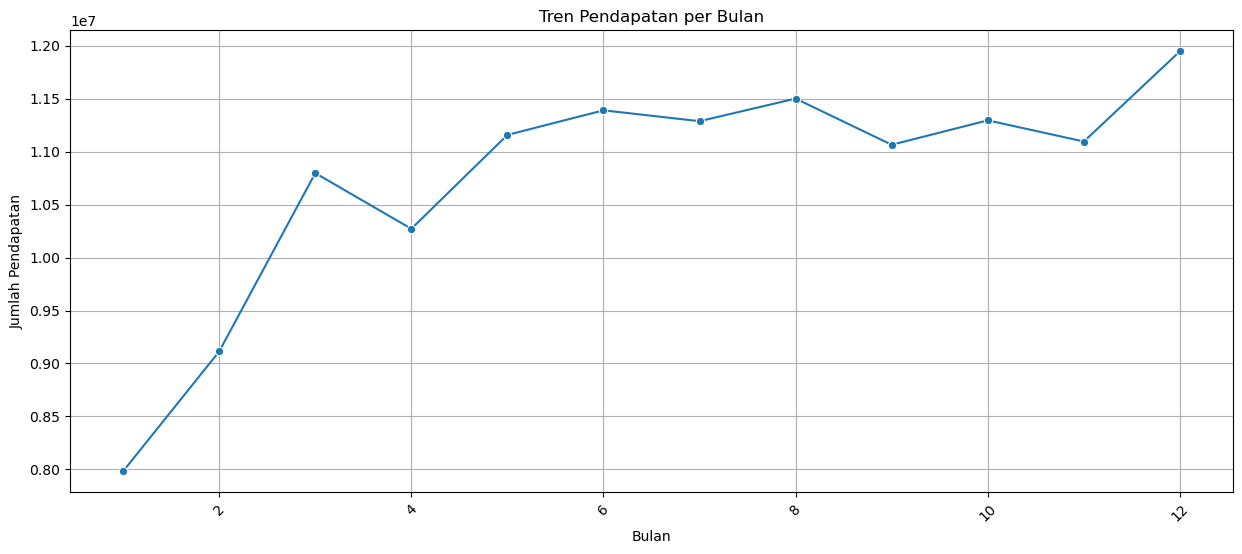

In [247]:
# Buat plot tren
plt.figure(figsize=(15, 6))
sns.lineplot(data=df1_group_tren3, x='bulan_num', y='jumlah_pendapatan', marker='o')
plt.title('Tren Pendapatan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pendapatan')
plt.xticks(rotation=45)  # Jika nama bulan panjang, rotasikan agar lebih terbaca
plt.grid(True)           # Tambahkan grid untuk membantu visualisasi
plt.show()

In [249]:
df1g.head()

,listing_id,tahun,bulan_num,pendapatan_per_bulan,median_price,jumlah_customer
0,3335,2016,2,120.0,120.0,1
1,3335,2016,3,3720.0,120.0,31
2,3335,2016,4,3600.0,120.0,30
3,3335,2016,5,3720.0,120.0,31
4,3335,2016,6,3600.0,120.0,30


In [251]:
df1_juni = df1[df1['bulan_num'] == 6]
df1_juni.head()

,listing_id,date,bulan_num,tahun,pendapatan
797309,3335,2016-06-01,6,2016,120.0
797310,3335,2016-06-02,6,2016,120.0
797311,3335,2016-06-03,6,2016,120.0
797312,3335,2016-06-04,6,2016,120.0
797313,3335,2016-06-05,6,2016,120.0


In [295]:
df1_juni.describe()

,listing_id,date,bulan_num,tahun,pendapatan
count,7.724400e+04,77244,77244.0,77244.0,77244.000000
mean,5.170853e+06,2016-06-15 13:29:23.368028672,6.0,2016.0,147.473137
min,3.335000e+03,2016-06-01 00:00:00,6.0,2016.0,20.000000
25%,2.693137e+06,2016-06-08 00:00:00,6.0,2016.0,76.000000
50%,5.324459e+06,2016-06-16 00:00:00,6.0,2016.0,110.000000
75%,7.793293e+06,2016-06-23 00:00:00,6.0,2016.0,175.000000
max,1.034016e+07,2016-06-30 00:00:00,6.0,2016.0,1099.000000
std,2.985627e+06,NaN,0.0,0.0,112.481803


In [297]:
df1_may = df1[df1['bulan_num'] == 5]
df1_juli.head()

,listing_id,date,bulan_num,tahun,pendapatan
797339,3335,2016-07-01,7,2016,120.0
797340,3335,2016-07-02,7,2016,120.0
797341,3335,2016-07-03,7,2016,120.0
797342,3335,2016-07-04,7,2016,120.0
797343,3335,2016-07-05,7,2016,120.0


In [299]:
df1_may.describe()

,listing_id,date,bulan_num,tahun,pendapatan
count,7.997100e+04,79971,79971.0,79971.0,79971.000000
mean,5.234380e+06,2016-05-16 00:15:43.181903360,5.0,2016.0,139.538183
min,3.335000e+03,2016-05-01 00:00:00,5.0,2016.0,20.000000
25%,2.761092e+06,2016-05-08 00:00:00,5.0,2016.0,75.000000
50%,5.395530e+06,2016-05-16 00:00:00,5.0,2016.0,110.000000
75%,7.859909e+06,2016-05-24 00:00:00,5.0,2016.0,169.000000
max,1.034016e+07,2016-05-31 00:00:00,5.0,2016.0,1099.000000
std,2.989867e+06,NaN,0.0,0.0,102.863280


In [304]:
df2_customer = df2[['listing_id','total_customer','total_pendapatan']]

In [306]:
df2_customer_terendah = df2_customer.sort_values(by='total_customer', ascending=True)

In [314]:
df2_customer_terendah.head(10)

,listing_id,total_customer,total_pendapatan
1121,3819831,1,82.0
3696,10235136,1,50.0
3687,10210625,1,90.0
3604,9868607,1,325.0
3562,9714078,1,89.0
261,656909,1,64.0
3717,10319529,1,49.0
3416,9371895,2,360.0
1110,3793047,2,200.0
1707,5563136,2,200.0


In [318]:
print(df2_customer_terendah.head(10).to_markdown())

|      |       listing_id |   total_customer |   total_pendapatan |
|-----:|-----------------:|-----------------:|-------------------:|
| 1121 |      3.81983e+06 |                1 |                 82 |
| 3696 |      1.02351e+07 |                1 |                 50 |
| 3687 |      1.02106e+07 |                1 |                 90 |
| 3604 |      9.86861e+06 |                1 |                325 |
| 3562 |      9.71408e+06 |                1 |                 89 |
|  261 | 656909           |                1 |                 64 |
| 3717 |      1.03195e+07 |                1 |                 49 |
| 3416 |      9.3719e+06  |                2 |                360 |
| 1110 |      3.79305e+06 |                2 |                200 |
| 1707 |      5.56314e+06 |                2 |                200 |


In [320]:
df2_pendapatan = df2[['listing_id','total_customer','total_pendapatan']]

In [322]:
df2_pendapatan_terendah = df2_pendapatan.sort_values(by='total_pendapatan', ascending=True)

In [324]:
df2_pendapatan_terendah.head(10)

,listing_id,total_customer,total_pendapatan
3717,10319529,1,49.0
3696,10235136,1,50.0
261,656909,1,64.0
2639,7798575,2,76.0
1121,3819831,1,82.0
3562,9714078,1,89.0
3687,10210625,1,90.0
207,458197,2,96.0
205,458191,2,98.0
202,458183,2,104.0


In [326]:
print(df2_pendapatan_terendah.head(10).to_markdown())

|      |       listing_id |   total_customer |   total_pendapatan |
|-----:|-----------------:|-----------------:|-------------------:|
| 3717 |      1.03195e+07 |                1 |                 49 |
| 3696 |      1.02351e+07 |                1 |                 50 |
|  261 | 656909           |                1 |                 64 |
| 2639 |      7.79858e+06 |                2 |                 76 |
| 1121 |      3.81983e+06 |                1 |                 82 |
| 3562 |      9.71408e+06 |                1 |                 89 |
| 3687 |      1.02106e+07 |                1 |                 90 |
|  207 | 458197           |                2 |                 96 |
|  205 | 458191           |                2 |                 98 |
|  202 | 458183           |                2 |                104 |


In [333]:
df2_rating = df2[['listing_id','total_customer','total_pendapatan','review_scores_rating']]

In [335]:
df2_rating_tertinggi =df2_rating.sort_values(by='review_scores_rating', ascending=False)

In [337]:
df2_rating_tertinggi.head(10)

,listing_id,total_customer,total_pendapatan,review_scores_rating
3698,10248139,34,720.0,100.0
2681,7858454,121,18150.0,100.0
1046,3585592,184,28520.0,100.0
1051,3604931,298,147510.0,100.0
2705,7901318,115,11270.0,100.0
2704,7900497,338,28730.0,100.0
2702,7887651,175,15532.0,100.0
2696,7875887,359,32555.0,100.0
2692,7873208,283,8215.0,100.0
1079,3691288,288,48282.0,100.0


In [339]:
df2_rating_terendah =df2_rating.sort_values(by='review_scores_rating', ascending=True)

In [341]:
df2_rating_terendah.head(10)

,listing_id,total_customer,total_pendapatan,review_scores_rating
3329,9183838,57,5450.0,20.0
3022,8474294,8,702.0,40.0
3311,9151374,332,34860.0,40.0
3312,9151865,66,6480.0,40.0
1726,5639238,270,29700.0,40.0
1517,4892529,203,52345.0,53.0
1956,6370313,89,22161.0,55.0
3273,9075558,55,1960.0,57.0
2601,7732071,126,16254.0,60.0
3138,8754180,76,13300.0,60.0


# STAGE 2

## Handling missing value dan data duplicate

In [91]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3723 entries, 0 to 3722
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   listing_id                        3723 non-null   int64  
 1   total_pendapatan                  3723 non-null   float64
 2   total_customer                    3723 non-null   int64  
 3   name                              3723 non-null   object 
 4   host_id                           3723 non-null   object 
 5   host_response_time                3243 non-null   object 
 6   host_response_rate                3243 non-null   float64
 7   host_acceptance_rate              3000 non-null   float64
 8   host_is_superhost                 3721 non-null   object 
 9   host_identity_verified            3721 non-null   object 
 10  zipcode                           3716 non-null   object 
 11  latitude                          3723 non-null   object 
 12  longit

In [93]:
print(df2.isna().sum().to_markdown())

|                                  |    0 |
|:---------------------------------|-----:|
| listing_id                       |    0 |
| total_pendapatan                 |    0 |
| total_customer                   |    0 |
| name                             |    0 |
| host_id                          |    0 |
| host_response_time               |  480 |
| host_response_rate               |  480 |
| host_acceptance_rate             |  723 |
| host_is_superhost                |    2 |
| host_identity_verified           |    2 |
| zipcode                          |    7 |
| latitude                         |    0 |
| longitude                        |    0 |
| is_location_exact                |    0 |
| property_type                    |    1 |
| room_type                        |    0 |
| accommodates                     |    0 |
| bathrooms                        |   16 |
| bedrooms                         |    6 |
| beds                             |    1 |
| bed_type                      

In [97]:
# Handiling weekly_price dan Monthly_price
df2['weekly_price'] = df2['weekly_price'].fillna(0)
df2['monthly_price'] = df2['monthly_price'].fillna(0)

# Handling review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, 
# review_scores_location,review_scores_value 
for col in ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
            'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']:
    df2[col] = df2.groupby('room_type')[col].transform(lambda x: x.fillna(x.median()))

# Handling host_response_time dan host_acceptance_rate, bathrooms, bedrooms, beds
df2['host_response_rate'] = df2['host_response_rate'].fillna(df2['host_response_rate'].median())
df2['host_acceptance_rate'] = df2['host_acceptance_rate'].fillna(df2['host_acceptance_rate'].median())
df2['bathrooms'] = df2['bathrooms'].fillna(df2['bathrooms'].median())
df2['bedrooms'] = df2['bedrooms'].fillna(df2['bedrooms'].median())
df2['beds'] = df2['beds'].fillna(df2['beds'].median())


df2['host_response_time'] = df2['host_response_time'].fillna(df2['host_response_time'].mode()[0])
df2['host_identity_verified'] = df2['host_identity_verified'].fillna(df2['host_identity_verified'].mode()[0])
df2['host_is_superhost'] = df2['host_is_superhost'].fillna(df2['host_is_superhost'].mode()[0])
df2['property_type'] = df2['property_type'].fillna(df2['property_type'].mode()[0])

In [ ]:
pip install geopy

Untuk handling data zipcode tidak bisa dilakukan dengan mengandalkan data mean, medaian, mode saja karena datanya berkaitan erat dangan latitude dan longitude maka dari itu agar zipcode yang kosong terisi de